# Projet 5: Optimisez la gestion des données d'une boutique avec R ou Python

In [137]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats

folder = "/Users/yathyarayamauchiferreira/Documents/OpenClassrooms/Projet 5/"
final = folder + "df_final.xlsx"

#### Importation du df traité et nettoyé:

In [7]:
df_final = pd.read_excel(final)
df_final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_author,post_date,post_date_gmt,...,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type
0,3847,1,24.2,0,outofstock,15298,6,2,2018-02-08 12:58:52,2018-02-08 11:58:52,...,publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0,https://www.bottle-neck.fr/?post_type=product&...,0,product
1,3849,1,34.3,0,outofstock,15296,0,2,2018-02-08 13:49:41,2018-02-08 12:49:41,...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0,https://www.bottle-neck.fr/?post_type=product&...,0,product
2,3850,1,20.8,0,outofstock,15300,0,2,2018-02-08 14:08:36,2018-02-08 13:08:36,...,publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0,https://www.bottle-neck.fr/?post_type=product&...,0,product
3,4032,1,14.1,0,outofstock,19814,3,2,2018-02-09 14:01:05,2018-02-09 13:01:05,...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0,https://www.bottle-neck.fr/?post_type=product&...,0,product
4,4039,1,46.0,0,outofstock,19815,0,2,2018-02-12 09:04:37,2018-02-12 08:04:37,...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0,https://www.bottle-neck.fr/?post_type=product&...,0,product


In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         714 non-null    int64         
 1   onsale_web         714 non-null    int64         
 2   price              714 non-null    float64       
 3   stock_quantity     714 non-null    int64         
 4   stock_status       714 non-null    object        
 5   id_web             714 non-null    object        
 6   total_sales        714 non-null    int64         
 7   post_author        714 non-null    int64         
 8   post_date          714 non-null    datetime64[ns]
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  post_title         714 non-null    object        
 11  post_excerpt       714 non-null    object        
 12  post_status        714 non-null    object        
 13  comment_status     714 non-null    object        
 14  ping_statu

### 1) Chiffre d'affaire par produit:

**Création d'une colonne Chiffre d'affaire par produit:**

In [76]:
df_final['ca_produit'] = df_final['price']*df_final['total_sales']
df_final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_author,post_date,post_date_gmt,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,ca_produit
0,3847,1,24.2,0,outofstock,15298,6,2,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0,https://www.bottle-neck.fr/?post_type=product&...,0,product,145.2
1,3849,1,34.3,0,outofstock,15296,0,2,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0,https://www.bottle-neck.fr/?post_type=product&...,0,product,0.0
2,3850,1,20.8,0,outofstock,15300,0,2,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0,https://www.bottle-neck.fr/?post_type=product&...,0,product,0.0
3,4032,1,14.1,0,outofstock,19814,3,2,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0,https://www.bottle-neck.fr/?post_type=product&...,0,product,42.3
4,4039,1,46.0,0,outofstock,19815,0,2,2018-02-12 09:04:37,2018-02-12 08:04:37,...,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0,https://www.bottle-neck.fr/?post_type=product&...,0,product,0.0


In [74]:
print(df_final.groupby("post_title")[["ca_produit"]].prod())

                                                    ca_produit
post_title                                                    
Agnès Levet Côte Rôtie Améthyste 2017                    164.8
Agnès Levet Côte Rôtie Maestria 2017                     165.0
Agnès Levet Côte Rôtie Péroline 2017                     171.0
Alain Graillot Crozes-Hermitage Blanc 2018               244.0
Alain Graillot Crozes-Hermitage Rouge 2017               146.4
...                                                        ...
Zind-Humbrecht Pinot Gris Roche Calcaire 2017              0.0
Zind-Humbrecht Riesling Clos Windsbuhl 2014                0.0
Zind-Humbrecht Riesling Grand Cru Rangen De Tha...         0.0
Zind-Humbrecht Riesling Herrenweg de Turckheim ...        63.4
Zind-Humbrecht Zind 2017                                 154.2

[711 rows x 1 columns]


### 2) Total du chiffre d’affaires réalisé en ligne:

In [20]:
print('Le CA total réalisé en ligne est de {:,} euros'.format(df_final.ca_produit.sum()))

Le CA total réalisé en ligne est de 70,568.6 euros


**La base de donnée ne présente pas des chiffres des ventes en boutique. Pour l'instant, seulement les ventes en lignes réprésentent le chiffre d'affaire total.**

### 3) J'aimerais que tu effectues une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité:

**Analyse des prix:**

In [37]:
df_final[['price']].describe()

,price
count,714.000000
mean,32.493137
std,27.810525
min,5.200000
25%,14.100000
50%,23.550000
75%,42.175000
max,225.000000


Il y a 714 valeurs avec 5,20€ pour le prix minimum et 225€ pour le prix maximum.
La moyenne de 32,49€
L'écart type est de  27,81€

mode = valeur la plus fréquente
moyenne= somme des valeurs divisée par leur nombre, robuste aux outliers
médiane= autant de valeur au-dessus qu'en-dessous

#### Representation de la repartition des prix en histogramme:


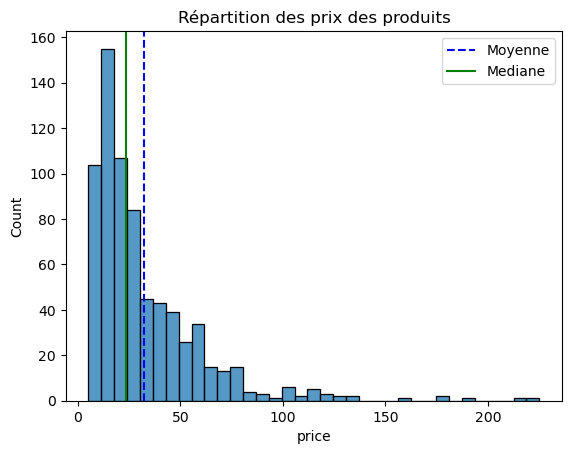

In [34]:
mean = df_final['price'].mean()
median = df_final['price'].median()

sns.histplot(data = df_final['price'])
plt.axvline(mean, color='b', linestyle = "--")
plt.axvline(median, color='g', linestyle = "-")
plt.legend({'Moyenne':mean,'Mediane':median})
plt.title('Répartition des prix des produits')
plt.show()

**Les prix moins chers sont plus fréquént que les prix les plus elevés**

### Identification des valeurs aberrantes (outliers) utilisant la méthode IQR:

Q1 = premier quantile
Q3 = troisième quantile)
IQR = Q3-Q1 (écart interquantile) 
Où Q3 est le 75e centile et Q1 est le 25e centile. 
Une fois le IQR calculé, on peut trouver la limite supérieure et inférieure en supprimant les valeurs aberrants

In [84]:
Q1 = df_final ['price'].quantile(0.25)
Q3 = df_final ['price'].quantile(0.75)
IQR = Q3 - Q1
intervalle_inf = Q1 - 1.5*IQR
intervalle_sup = Q3+1.5*IQR

print ("L'intervalle inférieur est de",intervalle_inf) 
print ("L'intervalle supérieur est de",intervalle_sup) 

L'intervalle inférieur est de -28.012500000000003
L'intervalle supérieur est de 84.28750000000001


**Il n'y a pas des valeurs abérrants sur les prix inférieurs car il ne peut pas avoir des valeurs négatifs. Il semblerait que les valeurs abérrants se retrouvent plutôt parmi les prix élevés.**

**Utiliser des filtres sur la colonne 'price' pour connaître les points qu'on veut retirer:**

In [79]:
outlier_IQR = df_final[(df_final['price']>intervalle_sup) | (df_final['price']<intervalle_inf)]
outlier_IQR.shape

(32, 23)

**On trouve 32 valeurs supérieures concernées**

**Suppression des valeurs aberrants par la jointure des deux tables:**

In [86]:
df_final_sansIQR = pd.merge(df_final,outlier_IQR, on ='price',how='outer',indicator=True).query('_merge=="left_only"')
df_final_sansIQR.shape


(682, 46)

**Répresentation des valeurs nettoyés en graphique boîte à moustaches:**

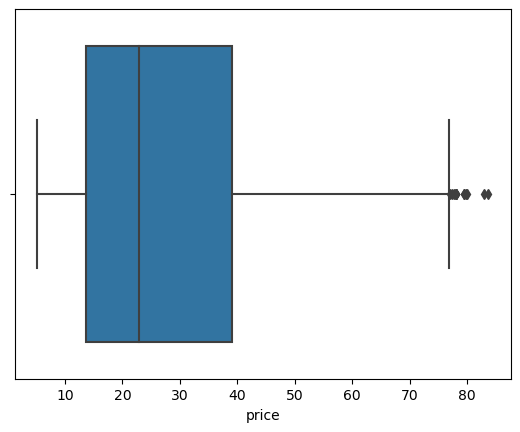

In [96]:
Boxplot = sns.boxplot(x=df_final_sansIQR["price"])

### Détecter et supprimer les valeurs aberrantes (outliers) utilisant la méthode Z-Score:

**Création d'un filtre pour identifier les valeurs absoluts:**

In [59]:
filtre_outlier_Zscore = abs(stats.zscore(df_final['price']))>3

In [60]:
outlier_Zscore = df_final[filtre_outlier_Zscore]
outlier_Zscore.shape

(14, 23)

In [63]:
df_final_sansZscore = df_final[~ filtre_outlier_Zscore]
df_final_sansZscore.shape

(700, 23)

In [65]:
df_final_sansZscore[['price']].describe()

,price
count,700.000000
mean,30.078000
std,21.561132
min,5.200000
25%,13.875000
50%,23.100000
75%,41.000000
max,115.000000


**Avec la méthode Z-score, on identifie moins de points abérrants.**

### Comparaison des deux méthodes (IQR et Z-score) en graphique:

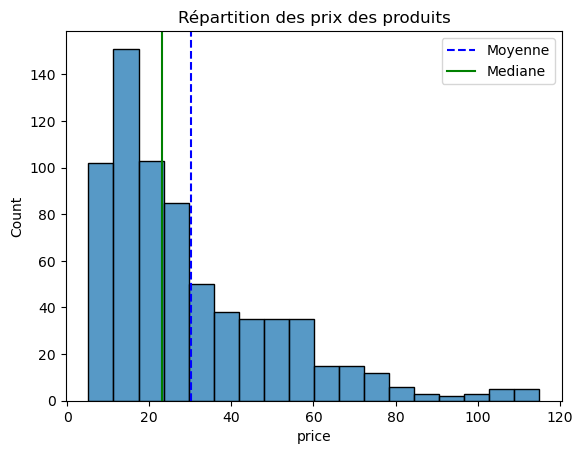

In [71]:
mean = df_final_sansZscore['price'].mean()
median = df_final_sansZscore['price'].median()

sns.histplot(data = df_final_sansZscore['price'])
plt.axvline(mean, color='b', linestyle = "--")
plt.axvline(median, color='g', linestyle = "-")
plt.legend({'Moyenne':mean,'Mediane':median})
plt.title('Répartition des prix des produits')
plt.show()

In [68]:
df_final_sansIQR[['price']].describe()

,price
count,682.000000
mean,28.172727
std,18.260664
min,5.200000
25%,13.700000
50%,22.800000
75%,39.000000
max,83.700000


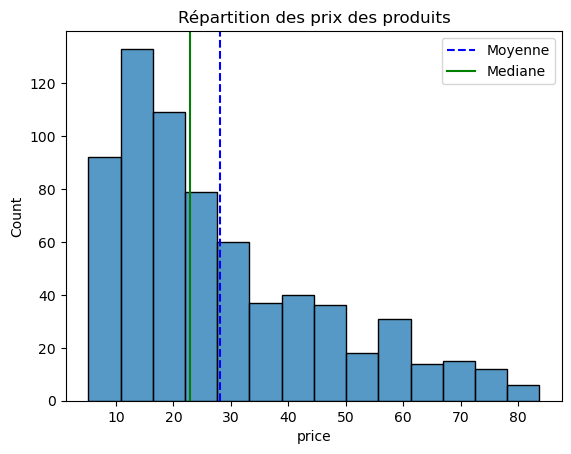

In [69]:
mean = df_final_sansIQR['price'].mean()
median = df_final_sansIQR['price'].median()

sns.histplot(data = df_final_sansIQR['price'])
plt.axvline(mean, color='b', linestyle = "--")
plt.axvline(median, color='g', linestyle = "-")
plt.legend({'Moyenne':mean,'Mediane':median})
plt.title('Répartition des prix des produits')
plt.show()

### Analyse Univariée des 3 échatillons:

**Comparaison des deux échantillons pour tester la normalité**

In [101]:
shapiro_test = stats.shapiro(df_final[['price']])
shapiro_test

ShapiroResult(statistic=0.7597628235816956, pvalue=5.7821899436157055e-31)

In [98]:
shapiro_test = stats.shapiro(df_final_sansZscore[['price']])
shapiro_test

ShapiroResult(statistic=0.8582130670547485, pvalue=1.3317294408223056e-24)

In [99]:
1.3317294408223056*10**-3

0.0013317294408223058

**Le nouvel échantillon traité avec la méthode Z-score ne suit pas une loi normale**

In [100]:
shapiro_test = stats.shapiro(df_final_sansIQR[['price']])
shapiro_test

ShapiroResult(statistic=0.8913288116455078, pvalue=1.6292172366961091e-21)

**En comparant les deux Pvalue, on se rapproche plus de la loi normale avec la méthode IQR, même si est inférieure à 0,05 (qui est le risque qu'on s'est fixé.**

### Répresentativité de la moyenne:

In [136]:
d = {'échantillon' : ['df_final','df_final_sansZscore','df_final_sansIQR'],
     'moyenne': [np.mean(df_final['price']), 
                 np.mean(df_final_sansZscore['price']), 
                 np.mean(df_final_sansIQR['price'])], 
                 'medianne': [np.median(df_final['price']), 
                              np.median(df_final_sansZscore['price']), 
                              np.median(df_final_sansIQR['price'])]}
df_statistique = pd.DataFrame(data=d)
df_statistique['moyenne trunquée']= [stats.trim_mean(df_final['price'],0.1), 
                              stats.trim_mean(df_final_sansZscore['price'],0.1), 
                              stats.trim_mean(df_final_sansIQR['price'],0.1)]
df_statistique['moyenne +- 10%']= df_statistique['moyenne'].apply(lambda x:'[{:.1f}:{:.1f}]'.format(x*0.9,x*1.1))
df_statistique['écart type']= [np.std(df_final['price']), 
                              np.std(df_final_sansZscore['price']), 
                              np.std(df_final_sansIQR['price'])]
df_statistique['coefficient de variation']=df_statistique['écart type']/df_statistique['moyenne']
df_statistique.set_index('échantillon',inplace = True)
df_statistique


,moyenne,medianne,moyenne trunquée,moyenne +- 10%,écart type,coefficient de variation
échantillon,,,,,,
df_final,32.493137,23.55,27.628671,[29.2:35.7],27.791043,0.855290
df_final_sansZscore,30.078000,23.10,26.814821,[27.1:33.1],21.545726,0.716328
df_final_sansIQR,28.172727,22.80,25.811172,[25.4:31.0],18.247272,0.647693
